In [1]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain

In [91]:
pd.set_option('display.max_columns', None)

# Сбор данных с сайта hh.ru

In [92]:
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) ' \
             'Chrome/104.0.5112.124 YaBrowser/22.9.4.863 Yowser/2.5 Safari/537.36'

JOB_TITLE = 'python backend разработчик'
URL = 'https://api.hh.ru/vacancies'

> ### Собираем id вакансий Python Backend dev

In [93]:
def number_of_pages(url: str, job_title: str, per_page=100) -> int:
    '''
    Получаем количество страниц с вакансиями
    '''
    param = {'text': job_title, 'per_page': per_page}
    req = requests.get(url, params=param)
    return req.json()['pages']

In [94]:
def get_job_id(url: str, job_title: str, per_page=100) -> list:
    '''
    Функция возвращает список id вакансий с названием job_title
    '''
    job_id = []
    pages = number_of_pages(url, job_title, per_page)
    for page in tqdm(range(pages)):
        param = {'text': job_title, 'per_page': per_page, 'page': page}
        req = requests.get(url, params=param)
        vacancies = req.json()
        for vac in vacancies.get('items'):
            job_id.append(vac.get('id'))
    return job_id

In [95]:
python_dev_job_id = get_job_id(URL, JOB_TITLE)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]


In [96]:
print('Количество найденных вакансий:', len(python_dev_job_id))

Количество найденных вакансий: 909


> ### Собираем подробные описания вакансий в список по найденным id.

In [97]:
list_vacs = []
for id in tqdm(python_dev_job_id):
    url_2 = f'https://api.hh.ru/vacancies/{id}'
    r_2 = requests.get(url_2)
    one_vac = r_2.json()
    list_vacs.append(one_vac)

100%|████████████████████████████████████████████████████████████████████████████████| 909/909 [03:35<00:00,  4.22it/s]


In [111]:
df = pd.DataFrame(list_vacs)
df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,address,allow_messages,experience,schedule,employment,department,contacts,description,branded_description,vacancy_constructor_template,key_skills,accept_handicapped,accept_kids,archived,response_url,specializations,professional_roles,code,hidden,quick_responses_allowed,driver_license_types,accept_incomplete_resumes,employer,published_at,created_at,initial_created_at,negotiations_url,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,72216524,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Python Backend Developer / WEB - разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 220000, 'to': 280000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p><strong>Добрый день!<br /><br />Компания на...,None,None,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '1713030', 'name': 'Перфект Системс', '...",2022-11-14T12:31:37+0300,2022-11-14T12:31:37+0300,2022-11-11T12:31:37+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72216524,[],[],[],False,[]
1,72379546,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Middle+ Back-end разработчик (Python),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 200000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p><strong>О команде:</strong></p> <p>Мы – евр...,None,None,"[{'name': 'Django Framework'}, {'name': 'Celer...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '9353449', 'name': 'Aola LLC', 'url': '...",2022-11-15T23:48:56+0300,2022-11-15T23:48:56+0300,2022-11-15T23:48:56+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72379546,[],[],[],True,[]
2,71905950,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Junior/Middle Python Developer (Backend) - раз...,None,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 60000, 'to': 100000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p>DreamDocs.ru (ранее ApRbot) помогает компан...,None,None,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '4602050', 'name': 'Апэрбот', 'url': 'h...",2022-11-15T10:10:23+0300,2022-11-15T10:10:23+0300,2022-11-03T10:10:23+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/71905950,[],[],[],False,[]
3,72034802,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Backend-разработчик jun+/mid- (Golang),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 400000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,"<p>ООО «Центр Развития Технологий»-компания, с...",None,None,"[{'name': 

> ### Оставляем нужные столбцы

In [112]:
df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages'],
      dtype='object')

In [113]:
df.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,address,allow_messages,experience,schedule,employment,department,contacts,description,branded_description,vacancy_constructor_template,key_skills,accept_handicapped,accept_kids,archived,response_url,specializations,professional_roles,code,hidden,quick_responses_allowed,driver_license_types,accept_incomplete_resumes,employer,published_at,created_at,initial_created_at,negotiations_url,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages
0,72216524,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Python Backend Developer / WEB - разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 220000, 'to': 280000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p><strong>Добрый день!<br /><br />Компания на...,None,None,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '1713030', 'name': 'Перфект Системс', '...",2022-11-14T12:31:37+0300,2022-11-14T12:31:37+0300,2022-11-11T12:31:37+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72216524,[],[],[],False,[]
1,72379546,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Middle+ Back-end разработчик (Python),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 200000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p><strong>О команде:</strong></p> <p>Мы – евр...,None,None,"[{'name': 'Django Framework'}, {'name': 'Celer...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '9353449', 'name': 'Aola LLC', 'url': '...",2022-11-15T23:48:56+0300,2022-11-15T23:48:56+0300,2022-11-15T23:48:56+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/72379546,[],[],[],True,[]
2,71905950,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Junior/Middle Python Developer (Backend) - раз...,None,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 60000, 'to': 100000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",None,True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,<p>DreamDocs.ru (ранее ApRbot) помогает компан...,None,None,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",False,False,False,None,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",None,False,False,[],False,"{'id': '4602050', 'name': 'Апэрбот', 'url': 'h...",2022-11-15T10:10:23+0300,2022-11-15T10:10:23+0300,2022-11-03T10:10:23+0300,None,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/71905950,[],[],[],False,[]
3,72034802,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Backend-разработчик jun+/mid- (Golang),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 400000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",None,None,"<p>ООО «Центр Развития Технологий»-компания, с...",None,None,"[{'name': 

In [114]:
col_filter = ['id', 'name', 'area', 'salary', 'experience', 'schedule', 'employment', 'key_skills', 'employer', 'languages', 'professional_roles']

In [115]:
df_vacancies = df.copy()
df_vacancies = df_vacancies[col_filter]

> ### Получаем значения из словарей

In [117]:
df_vacancies['area'] = df_vacancies.area.apply(lambda x: x.get('name'))
df_vacancies['experience'] = df_vacancies.experience.apply(lambda x: x.get('name'))
df_vacancies['schedule'] = df_vacancies.schedule.apply(lambda x: x.get('name'))
df_vacancies['employment'] = df_vacancies.employment.apply(lambda x: x.get('name'))
df_vacancies['key_skills'] = df_vacancies.key_skills.apply(lambda x: [i.get('name') for i in x])
df_vacancies['professional_roles'] = df_vacancies.professional_roles.apply(lambda x: x[0].get('name'))

In [118]:
df_vacancies['salary_from'] = df_vacancies.salary.apply(lambda x: x.get('from') if x is not None else None)
df_vacancies['salary_to'] = df_vacancies.salary.apply(lambda x: x.get('to') if x is not None else None)
df_vacancies['salary_currency'] = df_vacancies.salary.apply(lambda x: x.get('currency') if x is not None else None)

df_vacancies.drop(['salary'], axis=1, inplace=True)

In [119]:
df_vacancies['employer_id'] = df_vacancies.employer.apply(lambda x: x.get('id'))
df_vacancies['employer_name'] = df_vacancies.employer.apply(lambda x: x.get('name'))

df_vacancies.drop(['employer'], axis=1, inplace=True)

In [120]:
def get_lang(lang: list) -> list:
    return [[i.get('name'), i.get('level').get('name')] for i in lang]

df_vacancies['languages'] = df_vacancies.languages.apply(get_lang)
df_vacancies['languages'] = df_vacancies.languages.apply(lambda x: np.nan if not x else x)

In [121]:
df_vacancies.head()

,id,name,area,experience,schedule,employment,key_skills,languages,professional_roles,salary_from,salary_to,salary_currency,employer_id,employer_name
0,72216524,Python Backend Developer / WEB - разработчик,Москва,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Python, Linux, Bash, SQL, Git, ООП, FastAPI, ...",NaN,"Программист, разработчик",220000.0,280000.0,RUR,1713030,Перфект Системс
1,72379546,Middle+ Back-end разработчик (Python),Москва,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Django Framework, Celery, Docker, DockerCompo...",NaN,"Программист, разработчик",NaN,200000.0,RUR,9353449,Aola LLC
2,71905950,Junior/Middle Python Developer (Backend) - раз...,Новосибирск,От 1 года до 3 лет,Полный день,Полная занятость,"[Python, Linux, Django Framework, Bash, Docker...",NaN,"Программист, разработчик",60000.0,100000.0,RUR,4602050,Апэрбот
3,72034802,Backend-разработчик jun+/mid- (Golang),Москва,От 1 года до 3 лет,Полный день,Полная занятость,"[Golang, Linux, PostgreSQL, Docker, Python]",NaN,"Программист, разработчик",100000.0,400000.0,RUR,9244855,Центр Развития Технологий
4,72155975,Backend разработчик,Новосибирск,Более 6 лет,Полный день,Полная занятость,"[Python, PHP, JavaScript]",NaN,"Программист, разработчик",200000.0,200000.0,RUR,945093,Инетра


In [122]:
df_vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  909 non-null    object 
 1   name                909 non-null    object 
 2   area                909 non-null    object 
 3   experience          909 non-null    object 
 4   schedule            909 non-null    object 
 5   employment          909 non-null    object 
 6   key_skills          909 non-null    object 
 7   languages           155 non-null    object 
 8   professional_roles  909 non-null    object 
 9   salary_from         263 non-null    float64
 10  salary_to           203 non-null    float64
 11  salary_currency     305 non-null    object 
 12  employer_id         909 non-null    object 
 13  employer_name       909 non-null    object 
dtypes: float64(2), object(12)
memory usage: 99.5+ KB


In [123]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1.6)
sns.set_style("whitegrid")

> #### Количество вакансий по городам

In [124]:
top_ten_area_list = list(df_vacancies.groupby(['area']).size().sort_values(ascending=False).index[:10])
top_ten_area_list

['Москва',
 'Санкт-Петербург',
 'Алматы',
 'Новосибирск',
 'Тбилиси',
 'Казань',
 'Екатеринбург',
 'Минск',
 'Астана',
 'Ростов-на-Дону']

In [125]:
df_areas = df_vacancies['area'].copy()
df_areas = pd.DataFrame(df_areas)

In [126]:
df_areas.loc[df_areas.area.isin(top_ten_area_list)]

,area
0,Москва
1,Москва
2,Новосибирск
3,Москва
4,Новосибирск
...,...
903,Санкт-Петербург
905,Москва
906,Минск
907,Москва


In [127]:
df_areas['area'] = pd.Categorical(df_areas['area'], top_ten_area_list)

#### Гистограмма

Text(0, 0.5, 'Количество')

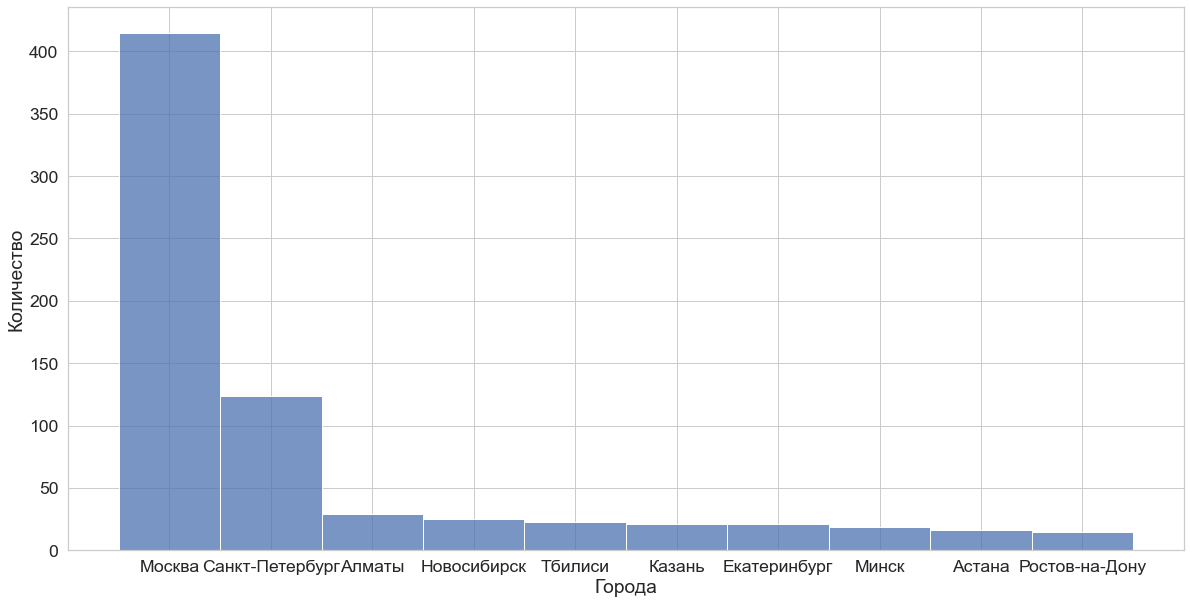

In [128]:
sns.histplot(data=df_areas.loc[df_areas.area.isin(top_ten_area_list)],
            x='area')
plt.xlabel('Города')
plt.ylabel('Количество')

#### Круговая диаграмма

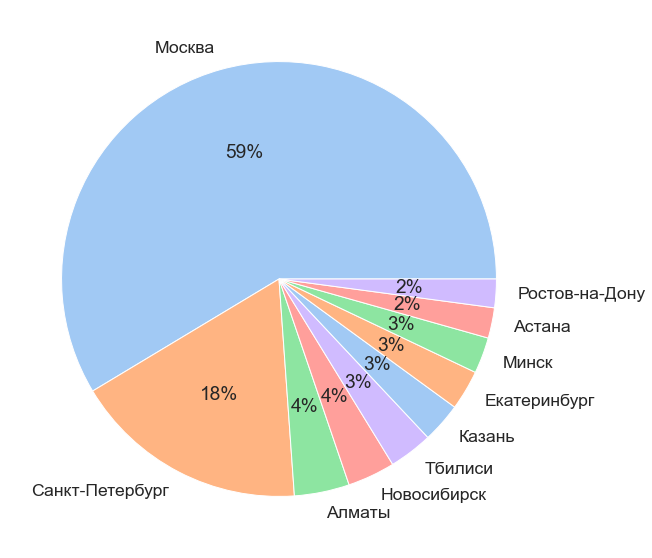

In [129]:
data = df_areas.loc[df_areas.area.isin(top_ten_area_list)].groupby(['area']).size()
labels = top_ten_area_list

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[ 0:5 ]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

> #### Количество вакансий по компаниям

In [130]:
df_employers = df_vacancies['employer_name'].copy()
df_employers = pd.DataFrame(df_employers)

In [131]:
top_ten_employer_list = list(df_vacancies.groupby(['employer_name']).size().sort_values(ascending=False).index[:10])
top_ten_employer_list

['СБЕР',
 'Яндекс',
 'Контур',
 '2ГИС',
 'МТС',
 'Cloud',
 'VK',
 'АйСи Сервис',
 'Ozon',
 'Selectel']

In [132]:
df_employers['employer_name'] = pd.Categorical(df_employers['employer_name'], top_ten_employer_list)

Text(0, 0.5, 'Количество')

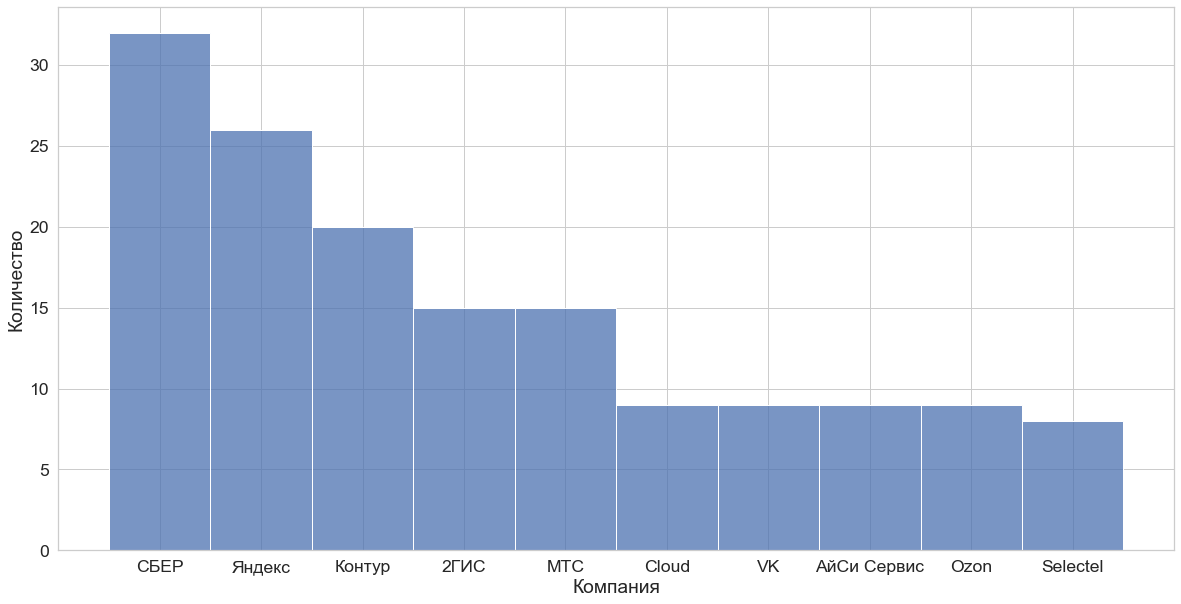

In [133]:
sns.set_style("whitegrid")
sns.histplot(data=df_employers.loc[df_employers.employer_name.isin(top_ten_employer_list)],
             x='employer_name')
plt.xlabel('Компания')
plt.ylabel('Количество')

>#### Формат работы

In [134]:
df_schedule = pd.DataFrame(df_vacancies.schedule.copy())
df_schedule.head()

,schedule
0,Удаленная работа
1,Удаленная работа
2,Полный день
3,Полный день
4,Полный день


Text(0, 0.5, 'Количество')

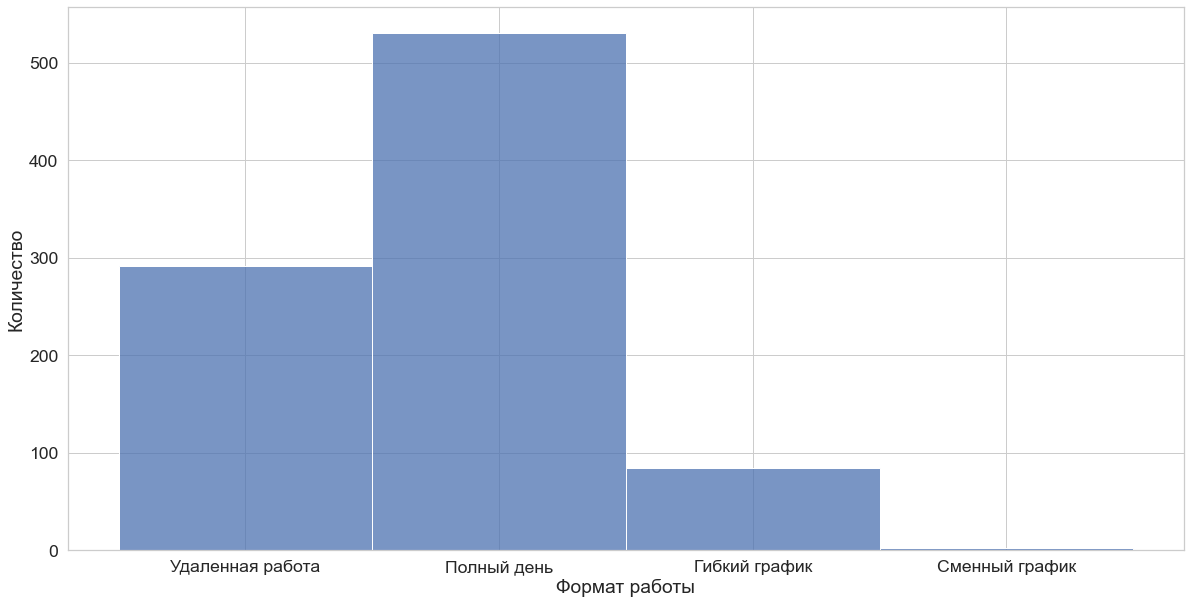

In [135]:
sns.histplot(data=df_schedule, x='schedule')
plt.xlabel('Формат работы')
plt.ylabel('Количество')

>#### Зарплаты

In [136]:
df_vacancies['salary'] = float()

In [137]:
df_vacancies.loc[~df_vacancies['salary_from'].isnull() & 
                 ~df_vacancies['salary_to'].isnull(), 'salary'] = (df_vacancies['salary_from'] +
                                                                   df_vacancies['salary_to']) / 2
df_vacancies.loc[df_vacancies['salary_from'].isnull() & 
                 ~df_vacancies['salary_to'].isnull(), 'salary'] = df_vacancies['salary_to']
df_vacancies.loc[~df_vacancies['salary_from'].isnull() & 
                 df_vacancies['salary_to'].isnull(), 'salary'] = df_vacancies['salary_from']

In [138]:
currency = dict(USD=60.4,
            EUR=62.16, 
            KZT= 0.1307, 
            UZS= 0.00539, 
            BYR= 24.96, 
            KGS= 0.716, 
            GEL= 22.3, 
            RUR= 1)

df_vacancies['new_salary'] = df_vacancies['salary_currency'].map(currency) * df_vacancies['salary']

In [139]:
# df_vacancies.loc[~df_vacancies['new_salary'].isnull()].groupby(['employer_name', 'new_salary'])

In [140]:
# t = df_vacancies.loc[~df_vacancies['new_salary'].isnull()].groupby(['employer_name']).agg({'new_salary': 'mean', 'employer_name': 'count'})
# # t = t.reset_index()
# t.sort_values(by='employer_name', ascending=False)

>## Анализ зарплат по регионам

Text(0, 0.5, 'Город')

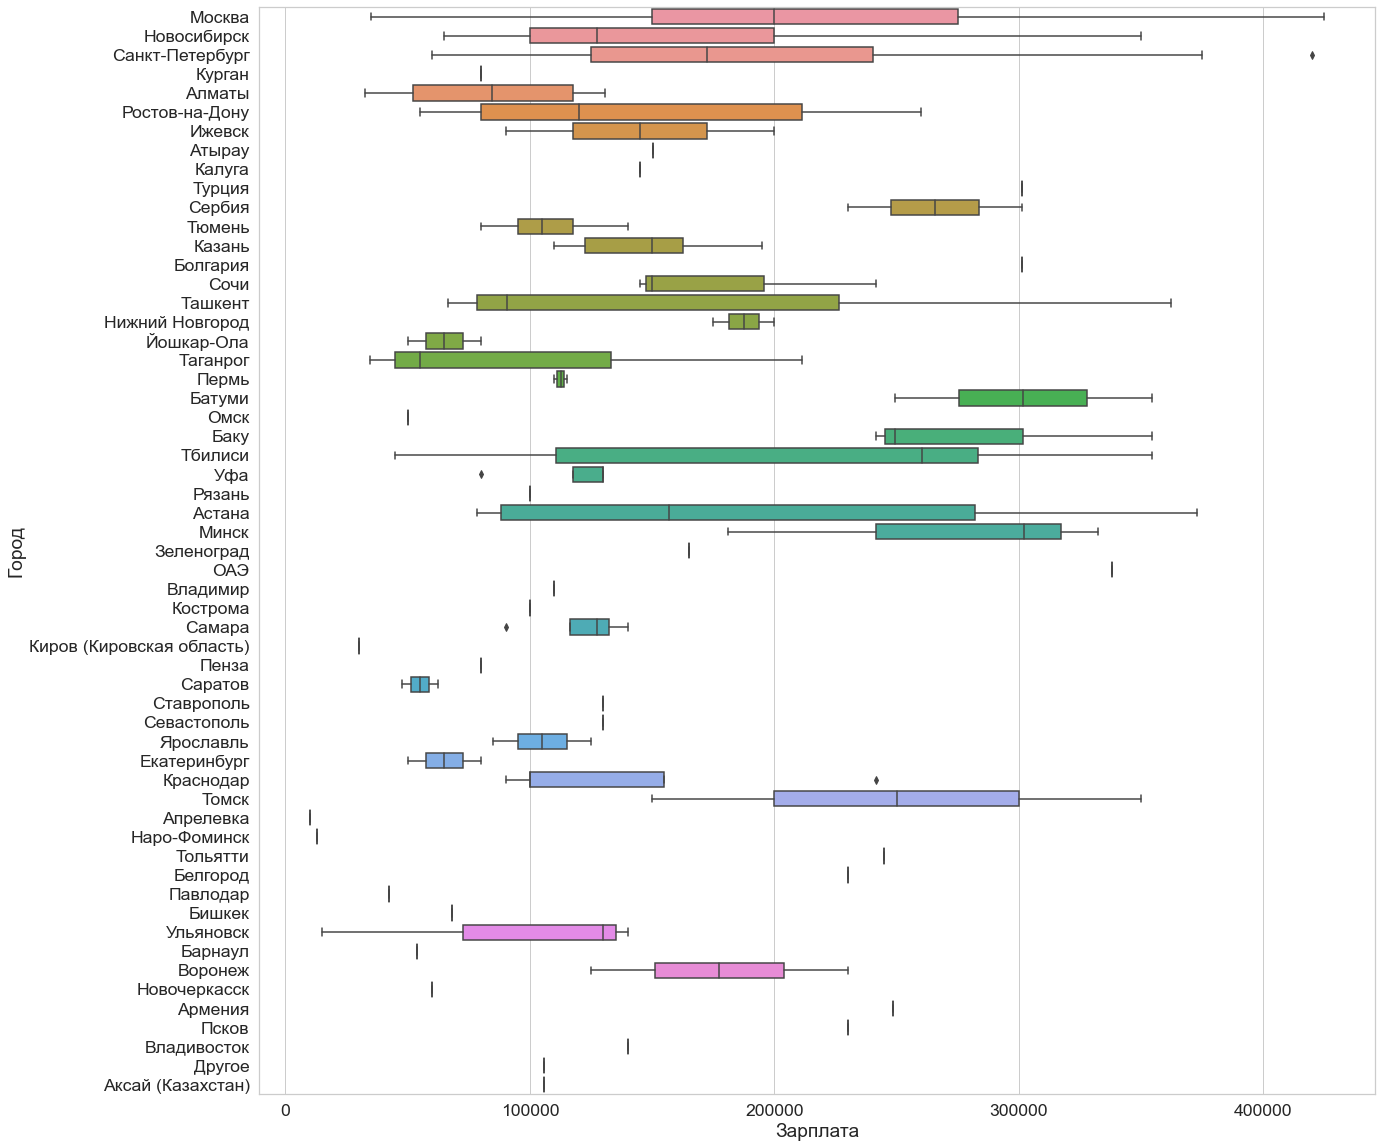

In [141]:
sns.set(rc={'figure.figsize':(20, 20)}, font_scale=1.6)
sns.set_style("whitegrid")
sns.boxplot(data=df_vacancies[~df_vacancies['new_salary'].isnull()], 
            x='new_salary', 
            y='area')
plt.xlabel('Зарплата')
plt.ylabel('Город')

>## Анализ зарплат по режиму работы

In [219]:
# сохранение в excel

# df_vacancies[~df_vacancies['new_salary'].isnull()].groupby('schedule').mean()['new_salary'].to_excel('zp.xlsx')

Text(0, 0.5, 'Формат работы')

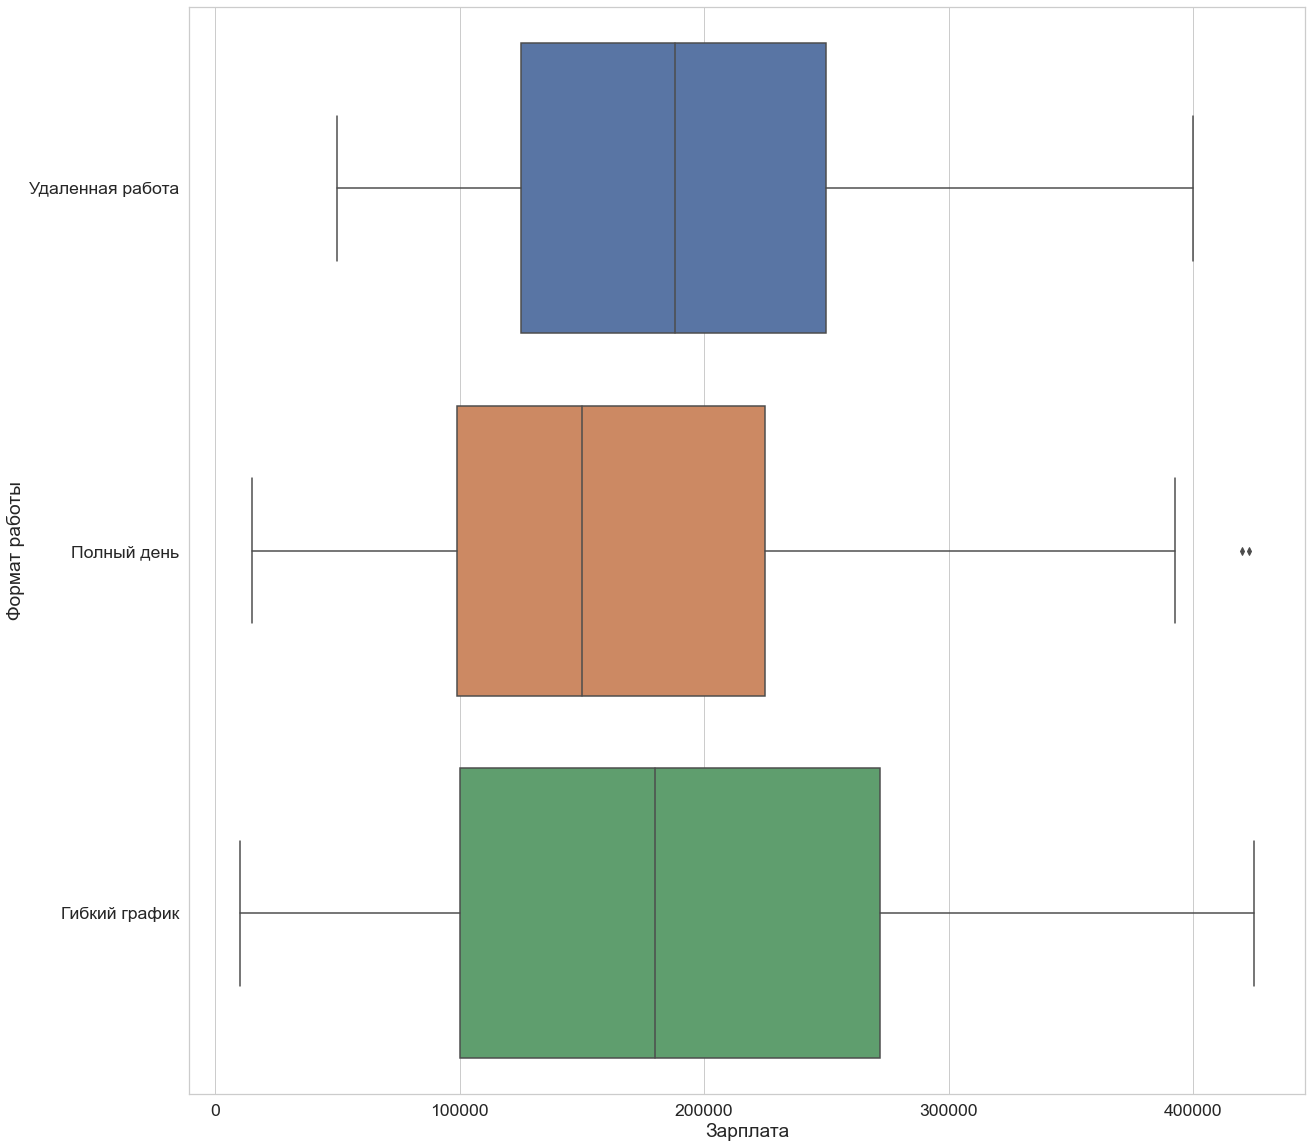

In [142]:
sns.boxplot(data=df_vacancies[~df_vacancies['new_salary'].isnull()], 
            x='new_salary', 
            y='schedule')
plt.xlabel('Зарплата')
plt.ylabel('Формат работы')

>## Wordcloud

### Работодатели

In [143]:
employer_name_text = ",".join(str(x) for x in list(df_vacancies.employer_name.values))

(-0.5, 1999.5, 3199.5, -0.5)

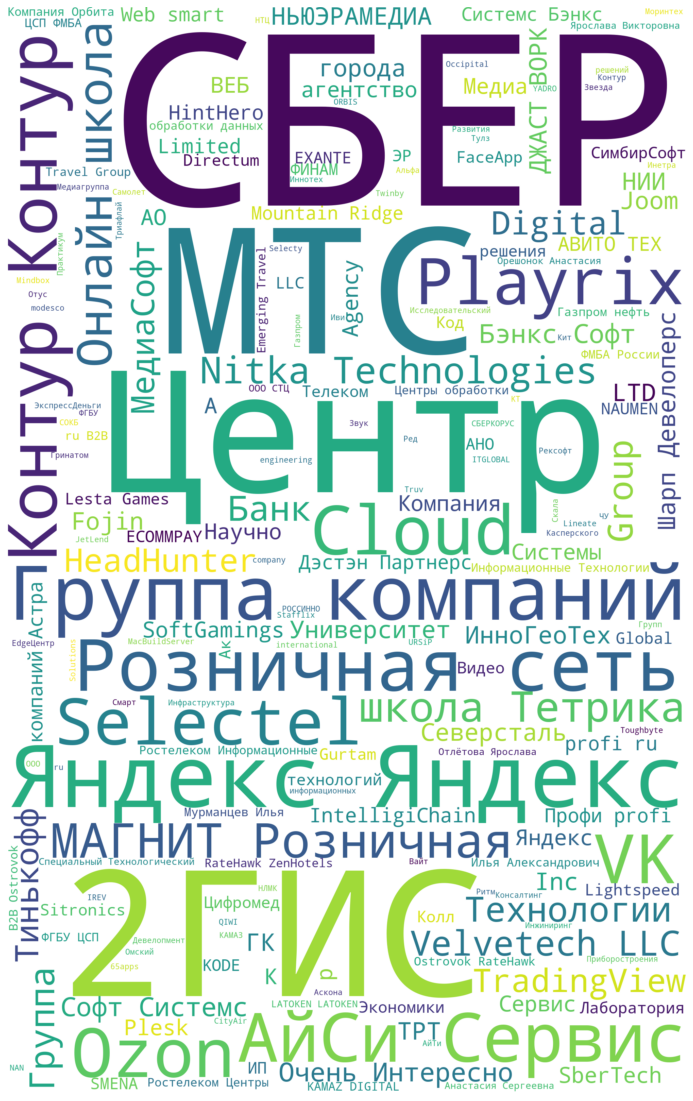

In [144]:
wordcloud = WordCloud(width= 2000, 
                      height = 3200,
                      background_color='white').generate(employer_name_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Навыки

In [263]:
# Заменяем вариации SQL
skills_list = list(chain(*df_vacancies.key_skills.values))
sql_list = ['mysql', 'postgresql', 'postgre sql', 'postgre', 'ms sql', 'mssql', 'postgres', 'postgress']
for i, skill in enumerate(skills_list):
    if skill.lower().strip() in sql_list:
        skills_list[i] = 'SQL'
    if skill.lower().strip() == 'python':
        del skills_list[i]

(-0.5, 2999.5, 1999.5, -0.5)

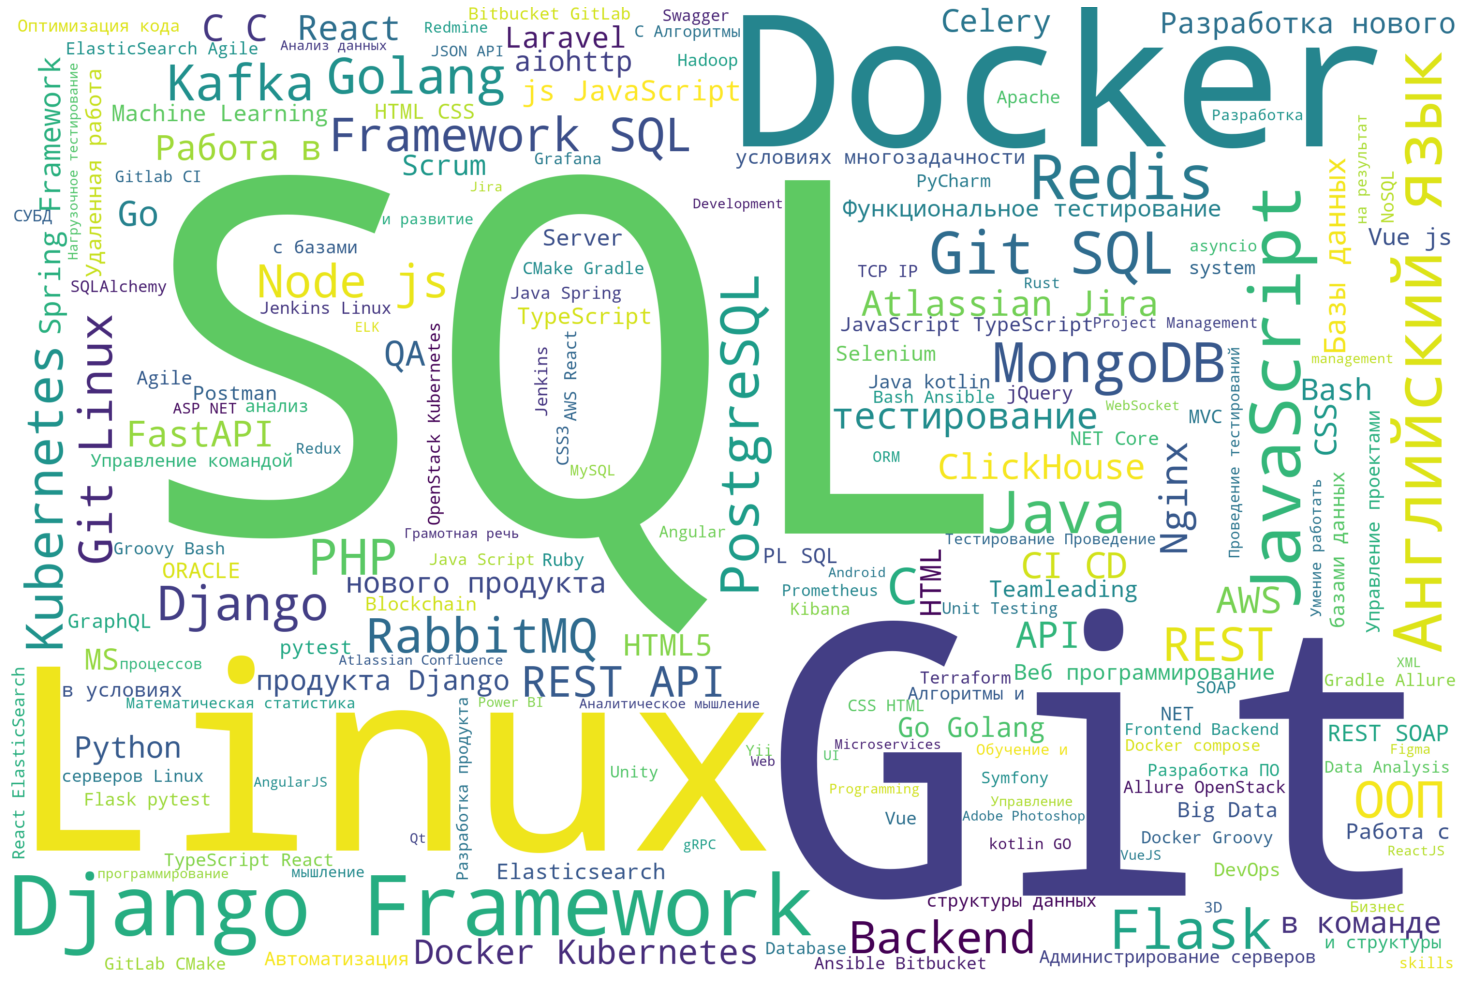

In [243]:
skills_text = ','.join(skills_list)
wordcloud = WordCloud(width= 3000, 
                      height = 2000,
                      background_color='white').generate(skills_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [244]:
df_skills = pd.DataFrame(skills_list)
df_skills.columns = ['skill']

In [245]:
top_ten_skills = list(df_skills.groupby(['skill']).size().sort_values(ascending=False).index[:10])

In [246]:
df_skills.loc[df_skills['skill'].isin(top_ten_skills)]

,skill
0,Linux
2,SQL
3,Git
6,Docker
7,Kubernetes
...,...
5478,JavaScript
5482,JavaScript
5483,SQL
5484,Git


In [247]:
df_skills['skill'] = pd.Categorical(df_skills['skill'], top_ten_skills)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

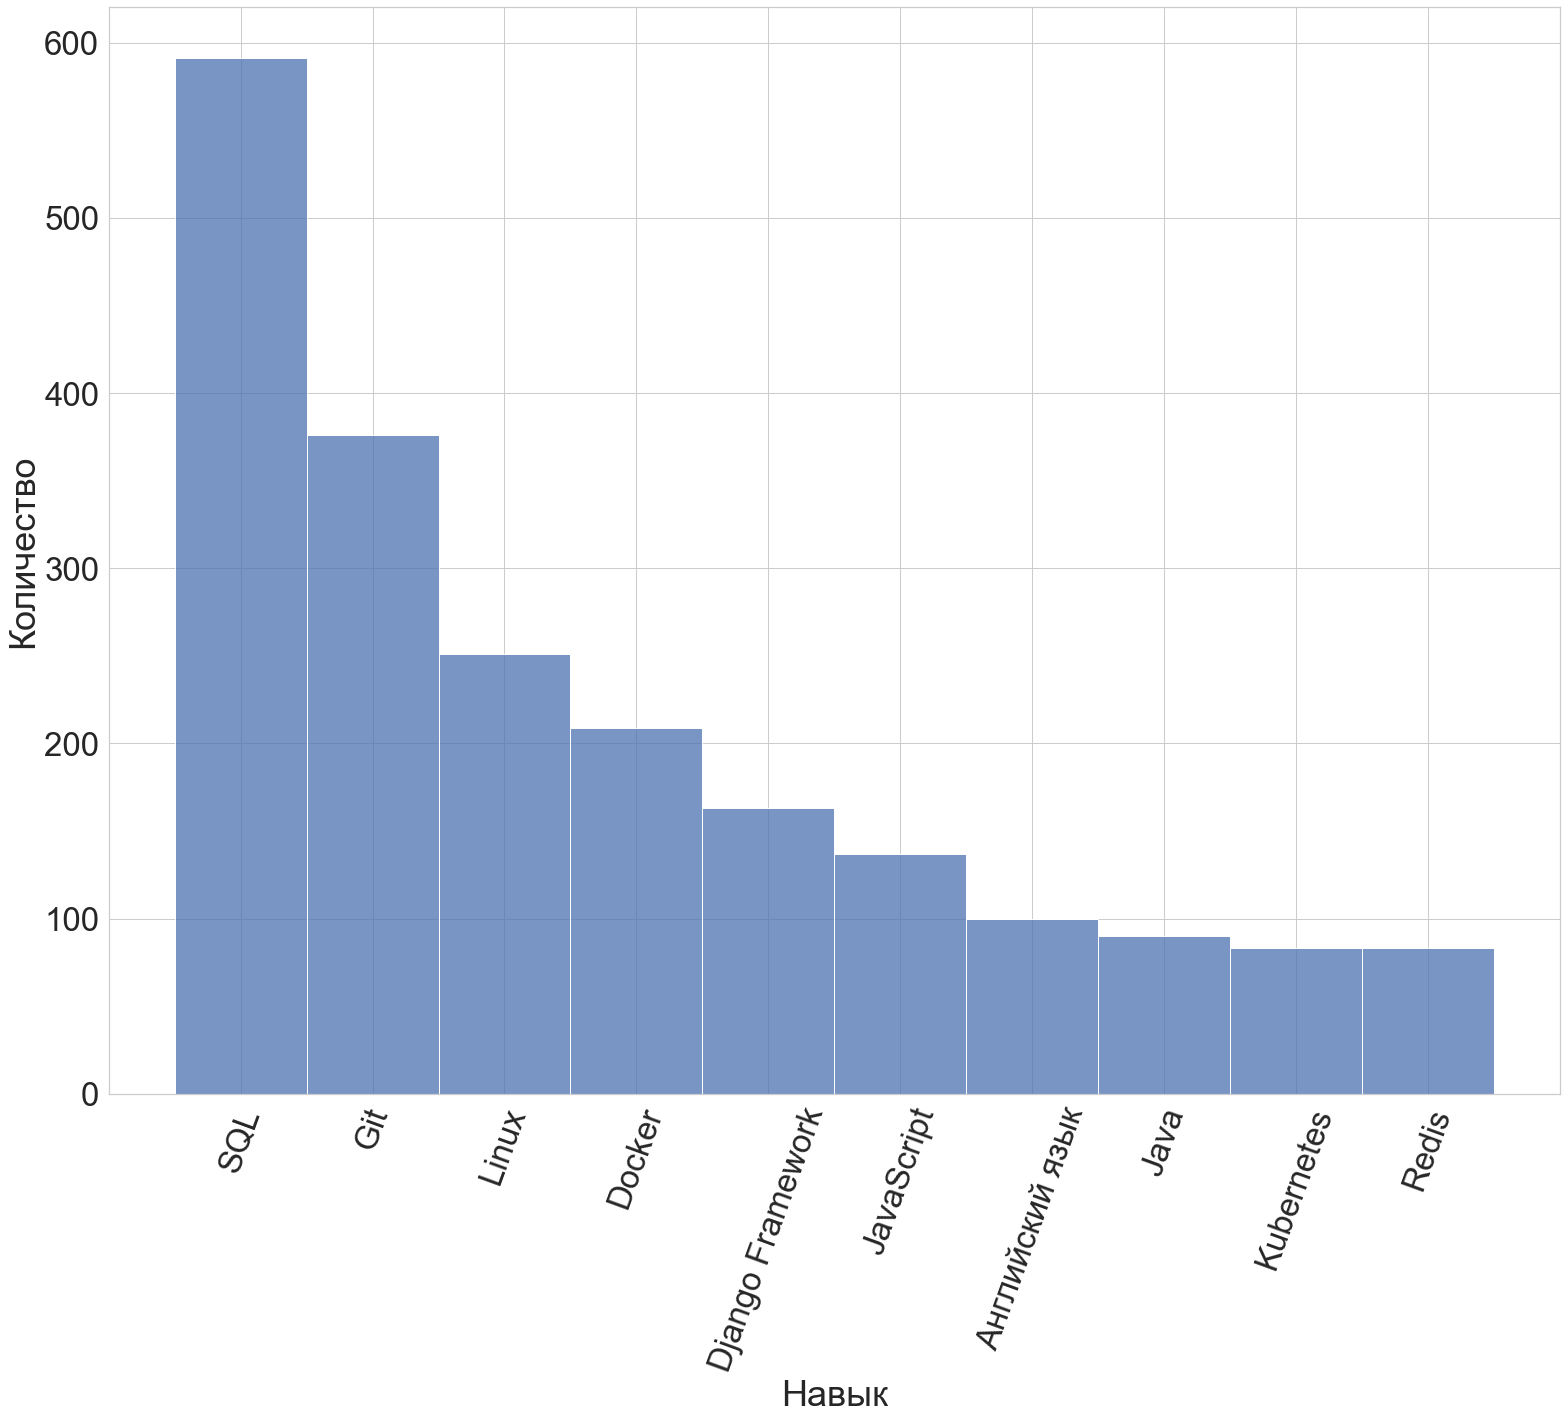

In [248]:
sns.set(rc={'figure.figsize':(26, 20)}, font_scale=3)
sns.set_style("whitegrid")
sns.histplot(data=df_skills.loc[df_skills['skill'].isin(top_ten_skills)], x='skill')
plt.xlabel('Навык')
plt.ylabel('Количество')
plt.xticks(rotation=70)






>## ЗП от стажа работы

In [152]:
# сохранение в excel

# df_vacancies.loc[~df_vacancies['new_salary'].isnull()].groupby('experience').agg({'new_salary': 'mean'}).to_excel('zp_ot_st.xlsx')

Text(0, 0.5, 'Стаж работы')

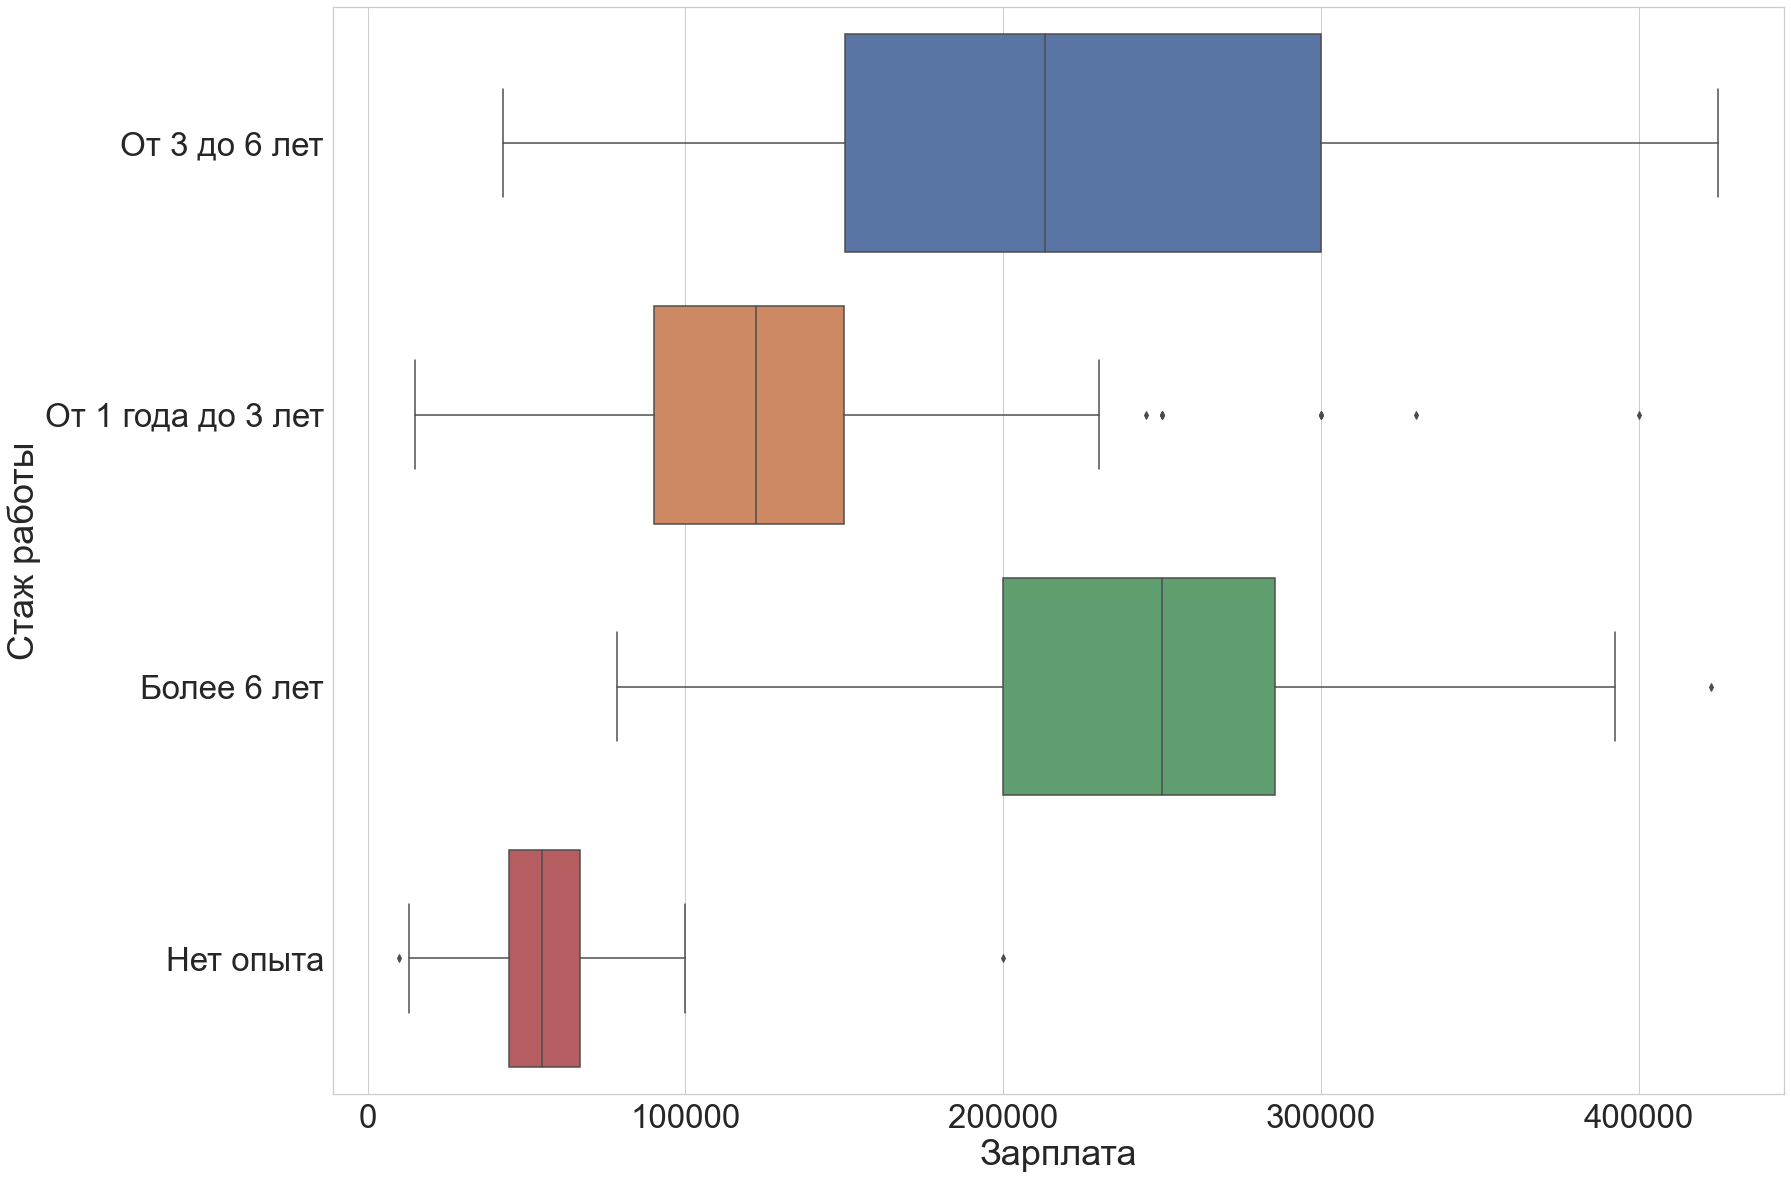

In [153]:
sns.boxplot(data=df_vacancies.loc[~df_vacancies['new_salary'].isnull()], 
            x='new_salary',
            y='experience')
plt.xlabel('Зарплата')
plt.ylabel('Стаж работы')

>## Роль в команде

In [168]:
professional_roles_list = ['Программист, разработчик', 'Руководитель группы разработки', 'Тестировщик', 
                           'Системный инженер', 'DevOps-инженер']
df_professional_roles = df_vacancies.loc[~df_vacancies.new_salary.isnull() & df_vacancies.professional_roles.isin(professional_roles_list)]

In [231]:
# сохранение в excel

# df_vacancies.loc[~df_vacancies.new_salary.isnull() & 
#                  df_vacancies.professional_roles.isin(professional_roles_list)].groupby('professional_roles').mean()['new_salary'].to_excel('zp.xlsx')

Text(0, 0.5, 'Роль')

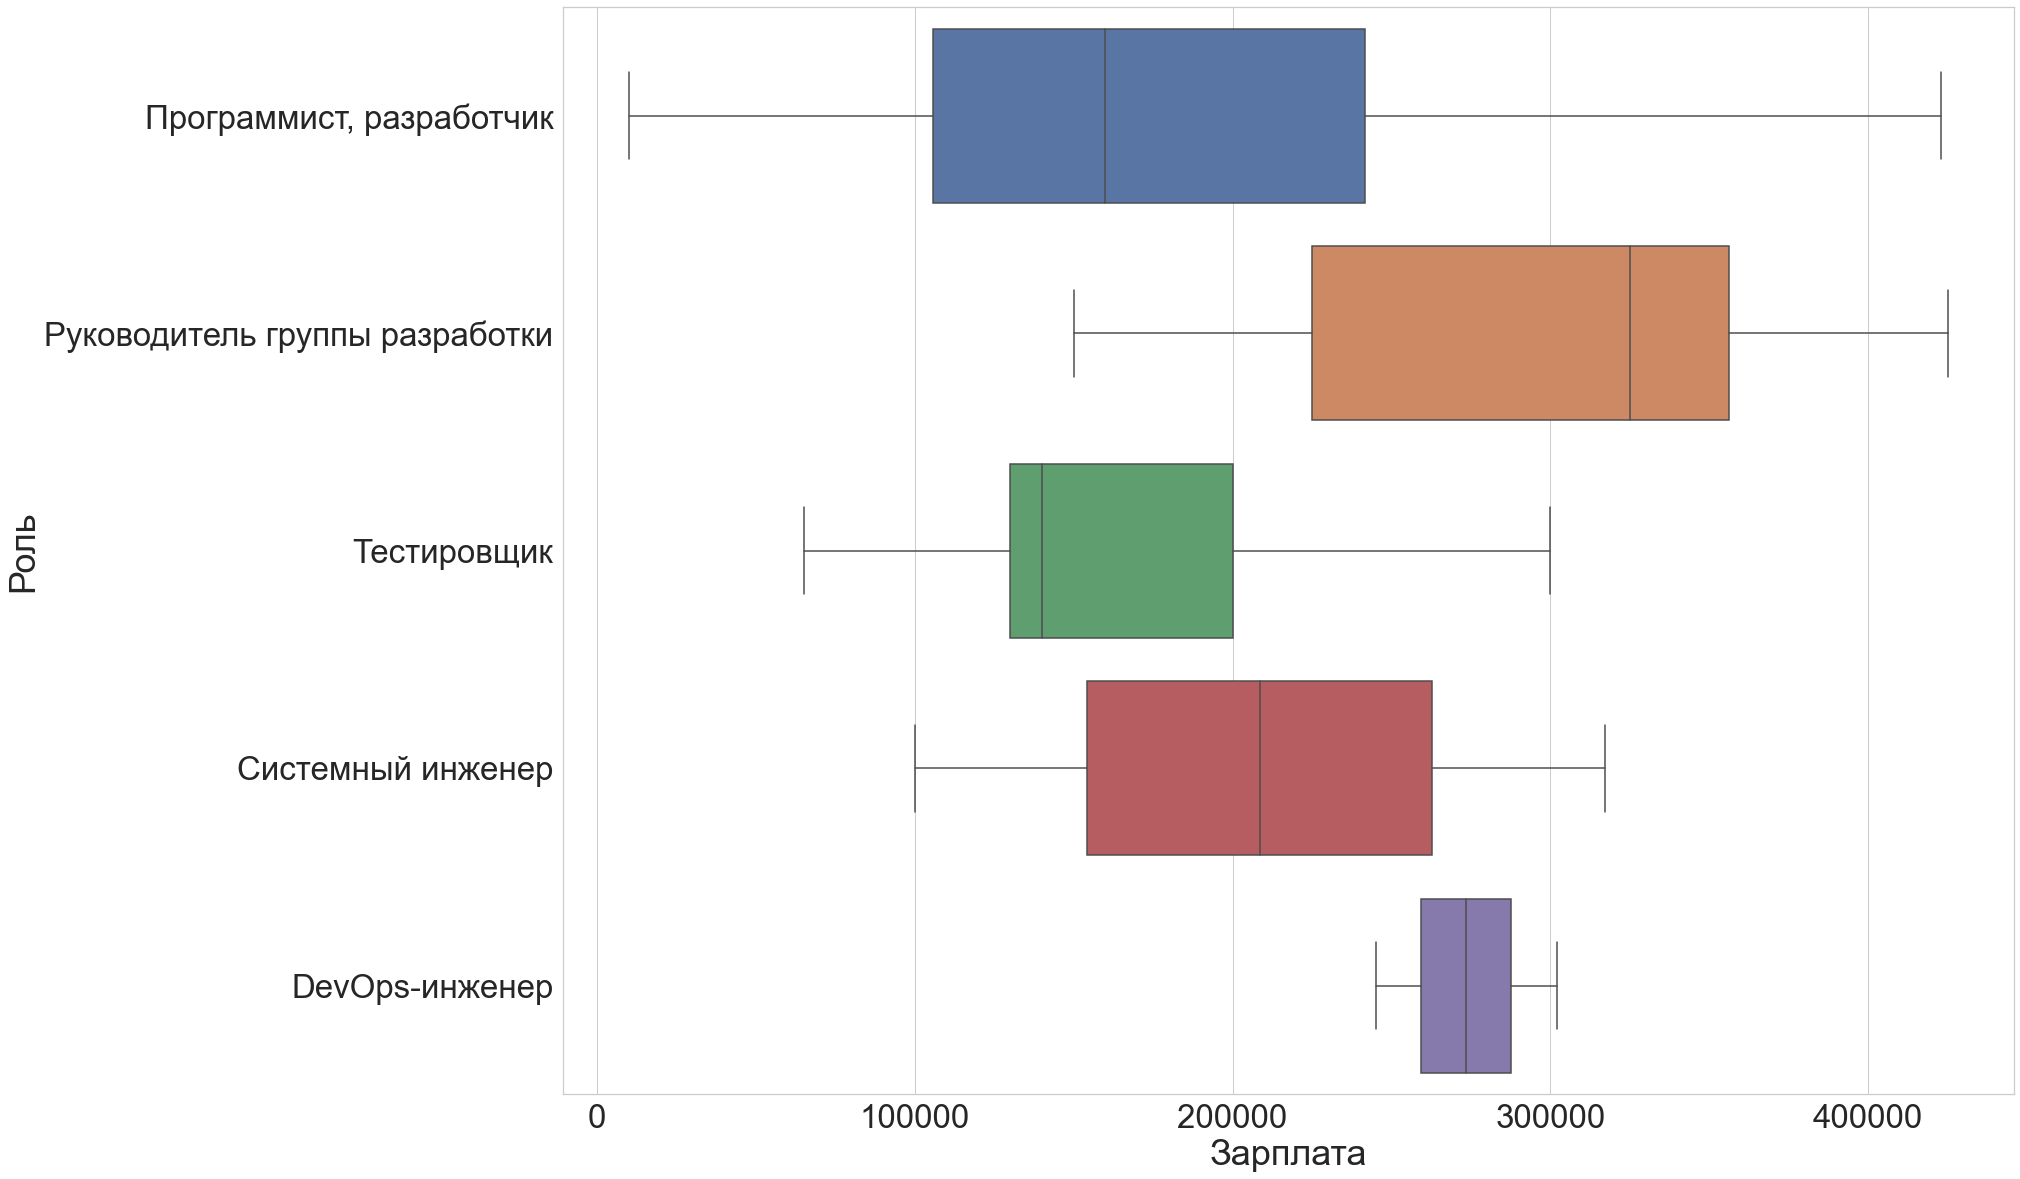

In [170]:
sns.boxplot(data=df_professional_roles, 
            x='new_salary',
            y='professional_roles')
plt.xlabel('Зарплата')
plt.ylabel('Роль')

>## Уровень владения  иностранными языками

In [184]:
df_vacancies['language_level'] = df_vacancies['languages']

,id,name,area,experience,schedule,employment,key_skills,languages,professional_roles,salary_from,salary_to,salary_currency,employer_id,employer_name,salary,new_salary,language_level
0,72216524,Python Backend Developer / WEB - разработчик,Москва,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Python, Linux, Bash, SQL, Git, ООП, FastAPI, ...",NaN,"Программист, разработчик",220000.0,280000.0,RUR,1713030,Перфект Системс,250000.0,250000.0,NaN
1,72379546,Middle+ Back-end разработчик (Python),Москва,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Django Framework, Celery, Docker, DockerCompo...",NaN,"Программист, разработчик",NaN,200000.0,RUR,9353449,Aola LLC,200000.0,200000.0,NaN
2,71905950,Junior/Middle Python Developer (Backend) - раз...,Новосибирск,От 1 года до 3 лет,Полный день,Полная занятость,"[Python, Linux, Django Framework, Bash, Docker...",NaN,"Программист, разработчик",60000.0,100000.0,RUR,4602050,Апэрбот,80000.0,80000.0,NaN
3,72034802,Backend-разработчик jun+/mid- (Golang),Москва,От 1 года до 3 лет,Полный день,Полная занятость,"[Golang, Linux, PostgreSQL, Docker, Python]",NaN,"Программист, разработчик",100000.0,400000.0,RUR,9244855,Центр Развития Технологий,250000.0,250000.0,NaN
4,72155975,Backend разработчик,Новосибирск,Более 6 лет,Полный день,Полная занятость,"[Python, PHP, JavaScript]",NaN,"Программист, разработчик",200000.0,200000.0,RUR,945093,Инетра,200000.0,200000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,71220870,Middle PHP Developer,Краснодар,От 1 года до 3 лет,Гибкий график,Полная занятость,"[Английский язык, PHP, ООП, RabbitMQ, Redis, M...",NaN,"Программист, разработчик",100000.0,NaN,RUR,6164545,Fojin,100000.0,100000.0,NaN
905,71218486,Frontend-разработчик,Москва,От 3 до 6 лет,Полный день,Полная занятость,"[JavaScript, Docker, Git, React, Ориентация на...",NaN,"Программист, разработчик",NaN,NaN,None,4333633,Цифромед,0.0,NaN,NaN
906,71263304,Chief Technical Officer (remote),Минск,От 3 до 6 лет,Удаленная работа,Полная занятость,"[Английский язык, Docker, Vue.js, Teamleading,...","[[Английский, B2 — Средне-продвинутый]]","Менеджер по продажам, менеджер по работе с кли...",NaN,NaN,None,5722775,Papabrand,0.0,NaN,"[[Английский, B2 — Средне-продвинутый]]"
907,71224134,Frontend разработчик (Vue),Москва,От 3 до 6 лет,Полный день,Частичная занятость,"[Английский язык, Git, JavaScript, Vuetify, Vue]","[[Английский, B2 — Средне-продвинутый]]","Программист, разработчик",1000.0,NaN,USD,4414395,Alandarev Limited,1000.0,60400.0,"[[Английский, B2 — Средне-продвинутый]]"


In [185]:
df_vacancies.loc[~df_vacancies.language_level.isnull(), 'language_level'] = df_vacancies.loc[~df_vacancies.language_level.isnull(), 
                                                                         'language_level'].apply(lambda x: x[0][1])

In [189]:
df_vacancies.loc[~df_vacancies.languages.isnull(), 'languages'] = df_vacancies.loc[~df_vacancies.languages.isnull(), 
                                                                         'languages'].apply(lambda x: x[0][0])

Text(0, 0.5, 'Уровень владения')

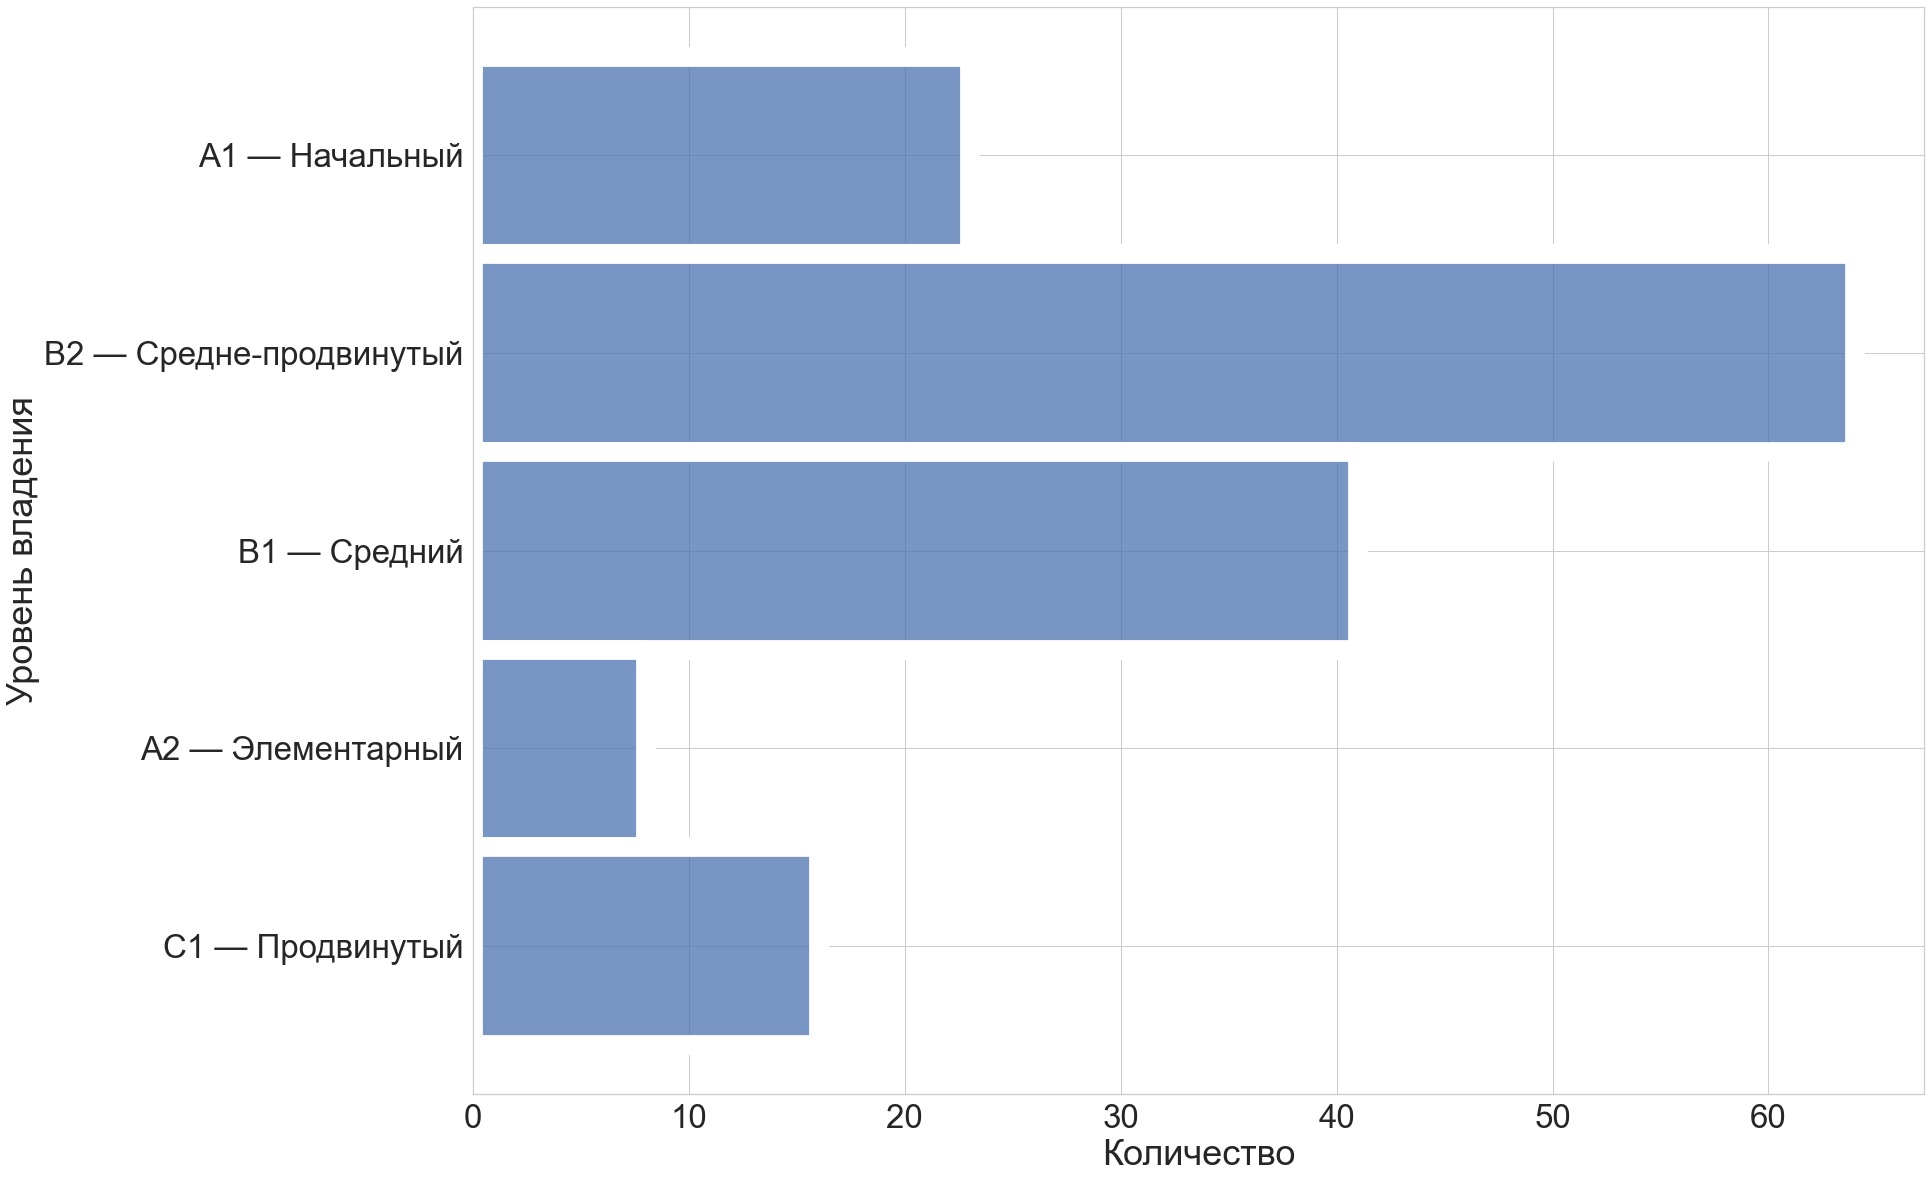

In [211]:
sns.histplot(data=df_vacancies.loc[df_vacancies.languages == 'Английский'], y='language_level')
plt.xlabel('Количество')
plt.ylabel('Уровень владения')

In [233]:
df_vacancies.loc[df_vacancies.languages == 'Английский'].count()

id                    152
name                  152
area                  152
experience            152
schedule              152
employment            152
key_skills            152
languages             152
professional_roles    152
salary_from            51
salary_to              47
salary_currency        63
employer_id           152
employer_name         152
salary                152
new_salary             63
language_level        152
dtype: int64

In [234]:
152 / 909

0.16721672167216722

In [261]:
df_vacancies.loc[~df_vacancies.new_salary.isnull()].groupby('area').mean()['new_salary'].sort_values(ascending=False).to_excel('zp.xlsx')